<a href="https://colab.research.google.com/github/brunnabrito/Sistema-de-recomenda-o-com-Python/blob/main/Machine_Learning_%7C_Sistema_de_recomenda%C3%A7%C3%A3o_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das libs

In [1]:
# Libs necessarias
import pandas as pd
import numpy as np

# Lib graficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Confiração no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configuração no Matplotlib
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# Carregando e conhecendo os dados

In [2]:
# Lendo os dados dos livros
Dados_Livros = pd.read_csv('Books.csv')
Dados_Avaliacao = pd.read_csv('Ratings.csv')
Dados_Usuario = pd.read_csv('Users.csv')

#Dimensao
Dados_Livros.shape, Dados_Avaliacao.shape, Dados_Usuario.shape

((271360, 8), (1149780, 3), (278858, 3))

In [3]:
# Conhecendo as bases
Dados_Livros.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Info
Dados_Livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
Dados_Avaliacao.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
Dados_Avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [7]:
Dados_Usuario.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
Dados_Usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# Modelagem dos dados

In [9]:
# Cruzando os dados

Tab_Cruzada = Dados_Livros.merge(Dados_Avaliacao, how='inner', on='ISBN')
Tab_Cruzada = Tab_Cruzada.merge(Dados_Usuario, how='inner', on='User-ID')
Tab_Cruzada.shape

(1031136, 12)

In [10]:
Tab_Cruzada.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [11]:
Tab_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [12]:
# Corrigindo registros 
def ajusta_ano(ano):
  return ano.apply(lambda x: int(x) if str(x).isdigit() else '')

# Converter colunas necessárias
Tab_Cruzada['Year-Of-Publication'] = ajusta_ano(Tab_Cruzada['Year-Of-Publication'])
Tab_Cruzada['Year-Of-Publication'] = pd.to_numeric(Tab_Cruzada['Year-Of-Publication'])


In [13]:
Tab_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031132 non-null  float64
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 102.3+ MB


In [14]:
# Verificando Localização
Tab_Cruzada['Location'].head()

0    stockton, california, usa
1     timmins, ontario, canada
2     timmins, ontario, canada
3     timmins, ontario, canada
4     timmins, ontario, canada
Name: Location, dtype: object

In [15]:
Tab_Cruzada['Location'].tail()

1031131                       venice, florida, usa
1031132                   tioga, pennsylvania, usa
1031133                      madrid, madrid, spain
1031134                  grand prairie, texas, usa
1031135    bielefeld, nordrhein-westfalen, germany
Name: Location, dtype: object

In [16]:
# Tratamento do texto

def Extrair_Pais(Regiao):
  Registro = Regiao
  Registro = Regiao.split(',')
  Fracao = Registro[-1].upper()
  return Fracao

Tab_Cruzada['Pais'] =  Tab_Cruzada['Location'].apply(Extrair_Pais)

Tab_Cruzada.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Pais
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,USA
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,CANADA
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,CANADA
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,CANADA


In [17]:
# Nulos
Tab_Cruzada.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         4
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
Pais                        0
dtype: int64

In [18]:
# Unicos
Tab_Cruzada.nunique()

ISBN                   270151
Book-Title             241071
Book-Author            101588
Year-Of-Publication       116
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
User-ID                 92106
Book-Rating                11
Location                22480
Age                       141
Pais                      288
dtype: int64

In [19]:
# Renomear colunas
Tab_Cruzada.rename(columns={
                        'Book-Title': 'Titulo',
                        'Book-Author': 'Autor',
                        'Year-Of-Publication': 'Ano_Publicacao',
                        'Publisher': 'Editora',
                        'User-ID': 'ID_Cliente',
                        'Book-Rating': 'Avaliacao',
                        'Location': 'Localizacao',
                        'Age': 'Idade'
                       }, inplace=True)

Tab_Cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'ID_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais'],
      dtype='object')

# Visualização

In [20]:
# Analise descritiva
Tab_Cruzada.describe()

,Ano_Publicacao,ID_Cliente,Avaliacao,Idade
count,1.031132e+06,1.031136e+06,1.031136e+06,753301.000000
mean,1.968195e+03,1.405945e+05,2.839051e+00,37.397648
std,2.311015e+02,8.052466e+04,3.854157e+00,14.098254
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000
25%,1.992000e+03,7.041500e+04,0.000000e+00,28.000000
50%,1.997000e+03,1.412100e+05,0.000000e+00,35.000000
75%,2.001000e+03,2.114260e+05,7.000000e+00,45.000000
max,2.050000e+03,2.788540e+05,1.000000e+01,244.000000


In [21]:
# Removendo avaliações zeradas

Tab_Cruzada = Tab_Cruzada.loc[Tab_Cruzada['Avaliacao'] > 0]

Tab_Cruzada.isnull().sum(), Tab_Cruzada.shape

(ISBN                   0
 Titulo                 0
 Autor                  1
 Ano_Publicacao         1
 Editora                2
 Image-URL-S            0
 Image-URL-M            0
 Image-URL-L            1
 ID_Cliente             0
 Avaliacao              0
 Localizacao            0
 Idade             114221
 Pais                   0
 dtype: int64,
 (383842, 13))

In [22]:
Tab_Cruzada['Avaliacao'].describe()

count    383842.000000
mean          7.626701
std           1.841339
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Avaliacao, dtype: float64

<Axes: title={'center': 'Analisando a avaliação'}, xlabel='Avaliacao'>

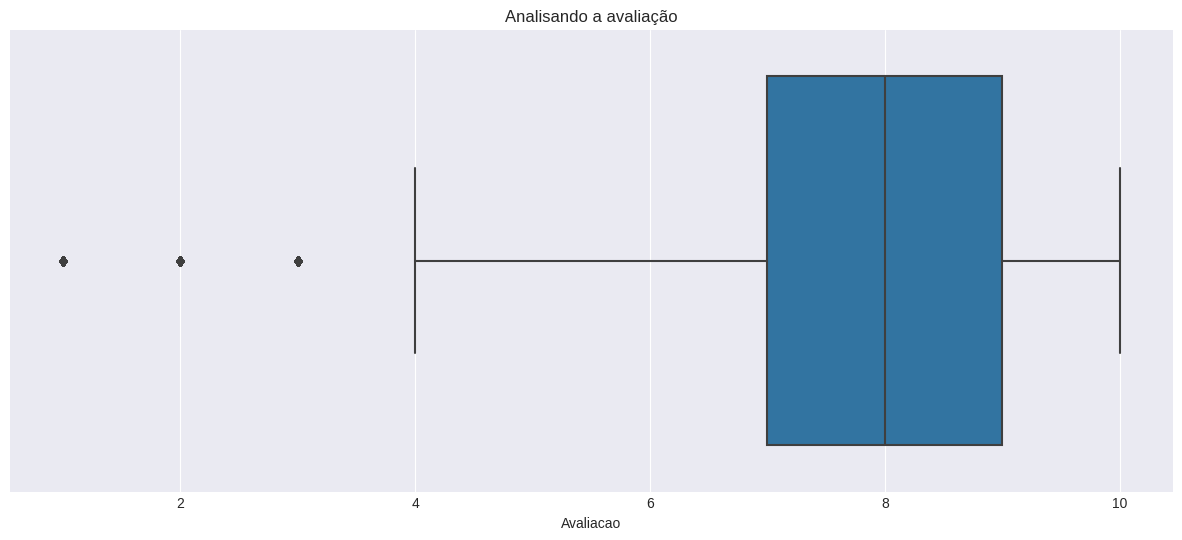

In [23]:
# Análise gráfica
plt.title('Analisando a avaliação')
sns.boxplot(data=Tab_Cruzada, x='Avaliacao')

In [24]:
# Analise
Analise = Tab_Cruzada.groupby(by=['Titulo']).agg(
    Quantidade = ('Titulo', 'count'),
    Medias = ('Avaliacao', 'mean'),
    Max = ('Avaliacao', 'max'), 
    Min = ('Avaliacao', 'min'),
    Mediana = ('Avaliacao', 'median'),
)

# Verificando
Analise.head()

,Quantidade,Medias,Max,Min,Mediana
Titulo,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9,9,9.0
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000,8,8,8.0
Dark Justice,1,10.000000,10,10,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,10,1,7.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10,10,10.0


In [25]:
# Verificando 
Analise.sort_values('Quantidade', ascending=False).head(5)

,Quantidade,Medias,Max,Min,Mediana
Titulo,,,,,
The Lovely Bones: A Novel,707,8.185290,10,1,8.0
Wild Animus,581,4.390706,10,1,4.0
The Da Vinci Code,494,8.439271,10,1,9.0
The Secret Life of Bees,406,8.477833,10,2,9.0
The Nanny Diaries: A Novel,393,7.437659,10,1,8.0


In [26]:
Analise.sort_values(['Mediana', 'Quantidade'], ascending=False).head(5)

,Quantidade,Medias,Max,Min,Mediana
Titulo,,,,,
Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,10,5,10.0
Harry Potter and the Goblet of Fire (Book 4),247,9.125506,10,3,10.0
Harry Potter and the Order of the Phoenix (Book 5),211,9.047393,10,4,10.0
"The Fellowship of the Ring (The Lord of the Rings, Part 1)",205,8.882927,10,2,10.0
Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500,10,5,10.0


In [27]:
# Analise quantidade x avaliação

px.scatter(
    # Dados
    data_frame=Analise,
    # Parametros
    x='Quantidade', y='Medias',
    # Titulo
    title='Média x Quantidade - Titulos',
    # Upgrade
    # marginal_y='rug', marginal_x='histogram'
)

In [28]:
# Correlação
Analise.corr()

,Quantidade,Medias,Max,Min,Mediana
Quantidade,1.000000,0.018880,0.175572,-0.251497,0.036604
Medias,0.018880,1.000000,0.889722,0.842385,0.989839
Max,0.175572,0.889722,1.000000,0.530760,0.887792
Min,-0.251497,0.842385,0.530760,1.000000,0.804023
Mediana,0.036604,0.989839,0.887792,0.804023,1.000000


In [29]:
Analise.corr('spearman')

,Quantidade,Medias,Max,Min,Mediana
Quantidade,1.000000,-0.015844,0.417668,-0.410713,0.019709
Medias,-0.015844,1.000000,0.836834,0.869198,0.985440
Max,0.417668,0.836834,1.000000,0.502869,0.842448
Min,-0.410713,0.869198,0.502869,1.000000,0.827077
Mediana,0.019709,0.985440,0.842448,0.827077,1.000000


In [30]:
Analise['Quantidade'].describe()

count    135567.000000
mean          2.831382
std           9.135691
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         707.000000
Name: Quantidade, dtype: float64

In [31]:
from unicodedata import normalize
#
def Classificacao_Quantidade(Quantidade):
  # agregar quantidade

  if int(Quantidade) <=5:
    return '1-5 avaliações'

  elif int(Quantidade) <=10:
    return '6-10 avaliações'

  elif int(Quantidade) <=50:
    return '11-50 avaliações'

  elif int(Quantidade) <=100:
    return '51-100 avaliações'

  else:
    return '>101 avaliações'

# Aplicacão
Pizza = Analise['Quantidade'].apply(Classificacao_Quantidade).value_counts(normalize=True)

# Transformar em df
Pizza = pd.DataFrame(Pizza).reset_index()

# plot
px.pie(data_frame=Pizza,
       #parametros
       names='index', values='Quantidade',
       #titulo
       title='Divisão das Quantidades'
       )

In [32]:
Pizza

,index,Quantidade
0,1-5 avaliações,0.920010
1,6-10 avaliações,0.042783
2,11-50 avaliações,0.032589
3,51-100 avaliações,0.003201
4,>101 avaliações,0.001416


In [35]:
# Publicacao
Analise_Ano = Tab_Cruzada['Ano_Publicacao'].value_counts().sort_index().reset_index()

Analise_Ano.head()

,index,Ano_Publicacao
0,0.0,5783
1,1376.0,1
2,1378.0,1
3,1806.0,1
4,1900.0,1


<BarContainer object of 20 artists>

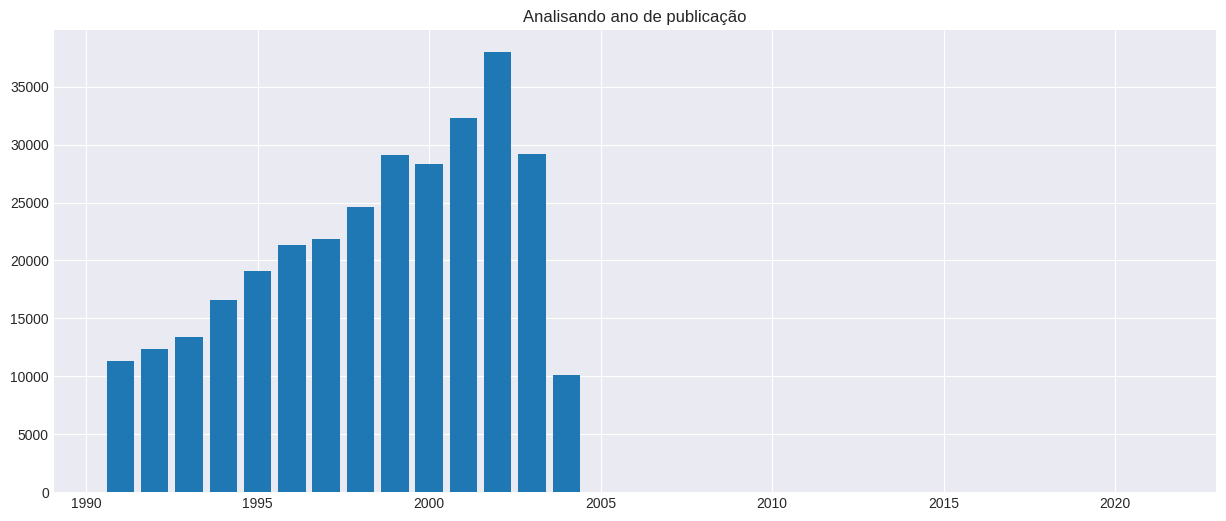

In [39]:
# plot

#filtro
Filtro = Analise_Ano.loc[(Analise_Ano['index'] > 1990) & (Analise_Ano['index'] < 2023)]

plt.title('Analisando ano de publicação')
plt.bar(Filtro['index'], Filtro['Ano_Publicacao'])

In [40]:
Tab_Cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'ID_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais'],
      dtype='object')

In [43]:
# Autores

Tab_Cruzada.groupby(by='Autor').agg(
    Quantidade = ('Avaliacao', 'count'),
    Media = ('Avaliacao', 'mean'),
).sort_values('Quantidade', ascending=False).head(10)

,Quantidade,Media
Autor,,
Stephen King,4639,7.815046
Nora Roberts,2938,7.629680
John Grisham,2550,7.523137
James Patterson,2387,7.697947
J. K. Rowling,1746,8.970218
Mary Higgins Clark,1677,7.503280
Janet Evanovich,1490,7.944966
Dean R. Koontz,1475,7.572203
Anne Rice,1245,7.387952


In [45]:
# Regiao

Tab_Cruzada['Pais'].value_counts(normalize=True).head(10) * 100

 USA               68.378135
 CANADA             9.267876
 UNITED KINGDOM     3.854190
 GERMANY            3.165625
                    2.737845
 SPAIN              1.874990
 AUSTRALIA          1.821322
 N/A                1.811943
 FRANCE             1.207789
 PORTUGAL           0.897505
Name: Pais, dtype: float64

In [46]:
# Concentração das avaliações
Tab_Cruzada['Pais'].value_counts(normalize=True).cumsum().head(10) * 100

 USA               68.378135
 CANADA            77.646011
 UNITED KINGDOM    81.500201
 GERMANY           84.665826
                   87.403671
 SPAIN             89.278662
 AUSTRALIA         91.099984
 N/A               92.911927
 FRANCE            94.119716
 PORTUGAL          95.017221
Name: Pais, dtype: float64

<Axes: xlabel='Idade'>

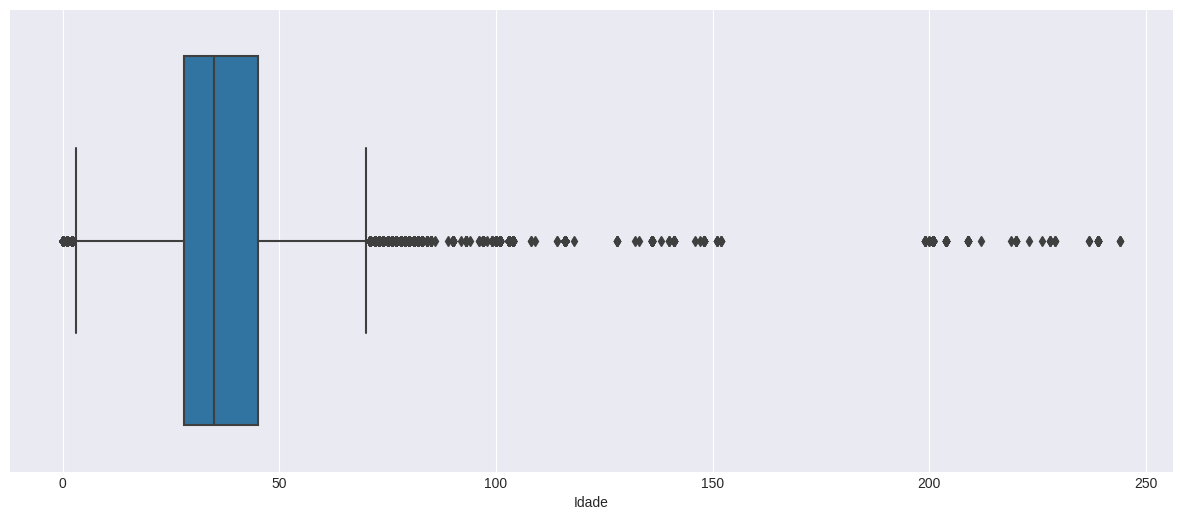

In [48]:
# Idade
sns.boxplot(data=Tab_Cruzada, x='Idade')

# Construção do Modelo

In [49]:
# Ajustar ( Avaliação dos livros -> Tab_cruzada)

Avaliacoes = Analise.reset_index().iloc[:, 0:2]

Avaliacoes

,Titulo,Quantidade
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135563,Ã?Â?rger mit Produkt X. Roman.,3
135564,Ã?Â?sterlich leben.,1
135565,Ã?Â?stlich der Berge.,1


In [51]:
Tab_Final = Tab_Cruzada.merge(Avaliacoes, how='inner', on='Titulo')

Tab_Final.head()

,ISBN,Titulo,Autor,Ano_Publicacao,Editora,Image-URL-S,Image-URL-M,Image-URL-L,ID_Cliente,Avaliacao,Localizacao,Idade,Pais,Quantidade
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA,9
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN,N/A,9
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8,"toronto, ontario, canada",30.0,CANADA,9
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866,9,"ottawa, ,",NaN,,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,123629,9,"kingston, ontario, canada",NaN,CANADA,9


In [53]:
# Filtro
Livros_Avaliados = Tab_Final.loc[Tab_Final['Quantidade']>= 50]

Livros_Avaliados.shape

(65477, 14)

In [54]:
# Duplicados

Livros_Avaliados.duplicated().sum()

0

In [57]:
Livros_Avaliados.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'ID_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais', 'Quantidade'],
      dtype='object')

In [62]:
# Gerar a matriz

Matriz = Livros_Avaliados.pivot_table(values='Avaliacao', index='Titulo', columns='ID_Cliente')

Matriz.fillna(0,inplace=True)

Matriz.head()

ID_Cliente,9,16,26,32,42,51,91,97,99,114,125,165,169,183,185,224,226,242,243,244,254,256,272,280,332,367,383,388,424,433,440,446,453,486,487,493,496,503,505,507,558,566,595,638,641,643,657,660,685,695,...,278325,278333,278342,278346,278350,278356,278390,278418,278422,278446,278469,278483,278522,278525,278535,278541,278543,278550,278551,278552,278554,278556,278561,278582,278586,278633,278641,278645,278653,278663,278672,278683,278698,278723,278732,278740,278755,278773,278786,278798,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
Titulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Transformação para vetores

from scipy.sparse import csc_matrix

Matriz_Sparse = csc_matrix(Matriz)

Matriz_Sparse

<651x24863 sparse matrix of type '<class 'numpy.float64'>'
	with 65081 stored elements in Compressed Sparse Column format>

In [66]:
# Exemplo da funcao
csc_matrix((4,4), dtype=np.int8).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [68]:
# Criar o modelo

from sklearn.neighbors import NearestNeighbors

Modelo = NearestNeighbors(
    #quantidade de recomendacoes
    n_neighbors=4,
    #Algoritmo
    algorithm='brute',
    #metrica de distancia
    metric='minkowski'
)

#Fitar o modelo
Modelo.fit(Matriz_Sparse)

NearestNeighbors(algorithm='brute', n_neighbors=4)

In [69]:
# Supervisionado = preve algo especificado [sim,nao], [0,1,2]
# Não supervisionado = o modelo aprende sozinho o que prever [ xxxx ] - ele calcula pela distância

# Este é um modelo não supervisionado

In [ ]:
# Recomendações

# Escolher livro
